# Tabular Data Binary Classification

We will use Linear Regression on a [tabular dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) from Kaggle.

The dataset consists of 918 observations with features: `Age`, `Sex`, `ChestPainType`, `RestingBP`, `Cholesterol`, `FastingBS`, `RestingECG`, `MaxHR`, `ExerciseAngina`, `Oldpeak`, `ST_Slope`, and `ST segment`.

In [ ]:
# TODO: think about when we should check the feature correlations and write the
# corresponding code (hint: get Pearson correlation for whole DataFrame df)

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'amllogin'
os.environ['KAGGLE_KEY'] = '35eca611ac64064016cba986e2161cdd'

!kaggle datasets download -d fedesoriano/heart-failure-prediction -p /content/dataset

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 21.2MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('/content/dataset/heart-failure-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/dataset/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Oldpeak', 'Age', 'RestingBP', 'Cholesterol', 'MaxHR']

Check class balance:

<Axes: >

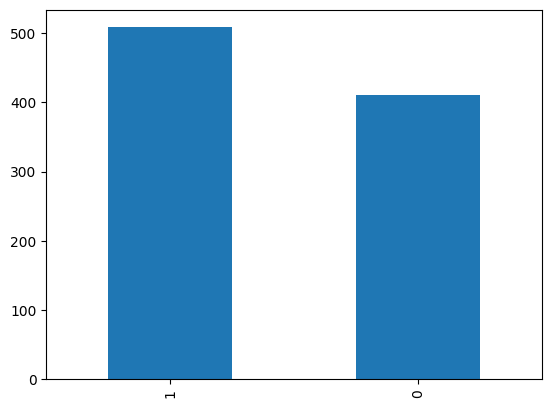

In [ ]:
df.HeartDisease.value_counts().plot.bar()

Preprocess data:

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for categorical_feature in categorical_features:
  df[categorical_feature] = le.fit_transform(df[categorical_feature])

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# normalization
mms = MinMaxScaler()

# standardization
ss = StandardScaler()

for numerical_feature in numerical_features:
  df[numerical_feature] = mms.fit_transform(df[[numerical_feature]])
  df[numerical_feature] = ss.fit_transform(df[[numerical_feature]])

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,-0.832432,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,3,-1.210356,0.596393,0,1,-0.188999,0,0.293283,1,1
914,1.536902,1,0,0.627078,-0.053049,1,1,0.164684,0,2.357094,1,1
915,0.370100,1,0,-0.129513,-0.620168,0,1,-0.857069,1,0.293283,1,1
916,0.370100,0,1,-0.129513,0.340275,0,0,1.461525,0,-0.832432,1,1


In [ ]:
from sklearn.model_selection import train_test_split

labels = df['HeartDisease']
df = df[df.columns.drop(['HeartDisease','RestingBP','RestingECG'])]

x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.2)
x_train

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
63,-0.796702,1,0,0.715305,0,-0.464087,1,0.105664,1
22,-0.478484,0,1,0.020128,0,1.068543,0,-0.832432,2
167,-0.584556,1,1,0.358569,0,-0.739174,0,-0.832432,2
257,-1.857431,1,2,-0.354903,0,1.382928,0,-0.832432,2
460,0.370100,1,0,0.715305,1,-0.739174,1,0.949950,1
...,...,...,...,...,...,...,...,...,...
770,-0.796702,0,1,0.047569,0,1.382928,0,-0.832432,2
48,-1.857431,1,2,1.291571,0,1.854507,0,0.105664,1
43,-0.160265,1,2,0.550658,0,1.304332,0,-0.832432,2
366,0.794391,1,0,-1.818435,0,-0.778472,1,1.043759,1


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0, C=10, penalty='l2')
classifier_lr

LogisticRegression(C=10, random_state=0)

Train:

In [ ]:
classifier_lr.fit(x_train, y_train)

LogisticRegression(C=10, random_state=0)

Test:

Accuracy: 83.696 %


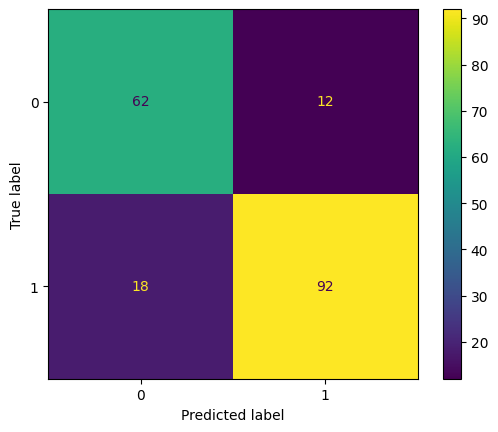

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted = classifier_lr.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, predicted)*100:.5} %')

cm = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

Interpret the model:

In [ ]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(classifier_lr,
                                x_test,
                                y_test,
                                n_repeats=20,
                                # random_state=42,
                                n_jobs=2)

elapsed_time = time.time() - start_time
print(f'Elapsed time to compute the importances: {elapsed_time:.3f} seconds')

result

Elapsed time to compute the importances: 0.896 seconds


{'importances_mean': array([-0.00027174,  0.02336957,  0.02880435,  0.00679348,  0.00570652,
         0.00625   ,  0.02527174,  0.02744565,  0.08423913]),
 'importances_std': array([0.00582182, 0.01309997, 0.01518825, 0.00616674, 0.01221013,
        0.00829138, 0.01049279, 0.01196578, 0.01993165]),
 'importances': array([[ 0.        , -0.00543478,  0.01086957,  0.        ,  0.        ,
         -0.00543478,  0.        ,  0.00543478,  0.        ,  0.        ,
         -0.00543478, -0.01086957, -0.00543478, -0.00543478,  0.        ,
          0.01086957,  0.        , -0.00543478,  0.01086957,  0.        ],
        [ 0.0326087 ,  0.03804348,  0.        ,  0.02173913,  0.02173913,
          0.02717391,  0.02717391,  0.02717391,  0.        ,  0.02717391,
          0.02173913,  0.03804348,  0.04891304,  0.02717391,  0.02173913,
          0.01630435,  0.        ,  0.0326087 ,  0.0326087 ,  0.00543478],
        [ 0.        ,  0.02173913,  0.04347826,  0.00543478,  0.02717391,
          0.02173

In [ ]:
feature_importances = pd.Series(result.importances_mean, index=df.columns)
feature_importances

Age              -0.000272
Sex               0.023370
ChestPainType     0.028804
Cholesterol       0.006793
FastingBS         0.005707
MaxHR             0.006250
ExerciseAngina    0.025272
Oldpeak           0.027446
ST_Slope          0.084239
dtype: float64

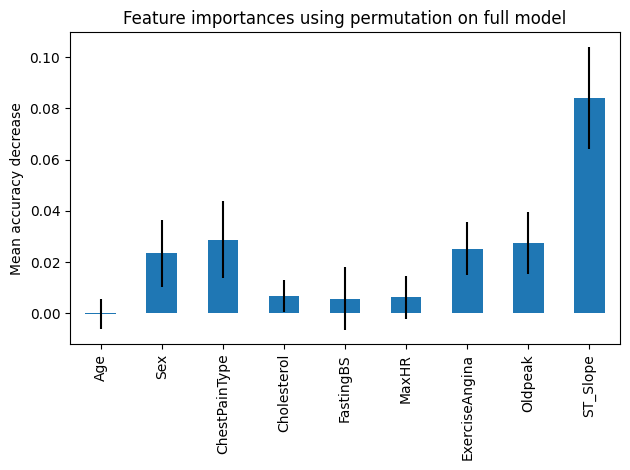

In [ ]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title('Feature importances using permutation on full model')
ax.set_ylabel('Mean accuracy decrease')
fig.tight_layout()
plt.show()

In [ ]:
'''
TODO: Answer these questions:

What is achieved by permuting feature values?

Would it also be a good idea to permute the target instead of the features?

Can feature importance be negative? If yes, what does it mean?

Why don't we leave out a feature instead of permuting it to measure its importance?
'''
